## Importing all the libraries

In [70]:
!pip install spacy
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
from docx import Document
import pythoncom
from win32com.client import Dispatch
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Laoding the Data Set

In [71]:
os.listdir(r'C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx')

['mix',
 'Peoplesoft',
 'Peoplesoft Resume',
 'React Developer',
 'SQL Developer',
 'workday']

In [72]:
file_path1 = []
category1  = []
directory1 = r'C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\Peoplesoft Resume'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')
    elif i.endswith('.pdf'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [73]:
d1 = pd.DataFrame(data = file_path1 , columns = ['Data'])
d1['Category1'] = category1
d1

,Data,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


In [74]:
file_path2 = []
category2 = []
directory2 = r'C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\React Developer'

for filename in os.listdir(directory2):
    file_full_path = os.path.join(directory2, filename)
    
    if filename.endswith('.docx'):
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path2.append(text)
            category2.append('React JS Developer')
        except Exception as e:
            print(f"Error processing {file_full_path}: {e}")
    
    elif filename.endswith('.pdf'):
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path2.append(text)
            category2.append('React JS Developer')
        except Exception as e:
            print(f"Error processing {file_full_path}: {e}")

Error processing C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf: The command `pdftotext C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf -` failed with exit code 127
------------- stdout -------------
------------- stderr -------------



In [75]:
d2 = pd.DataFrame(data = file_path2 , columns = ['Data'])
d2['Category2'] = category2
d2

,Data,Category2
0,Name: Ravali P \n\n\n\n ...,React JS Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer


In [76]:
file_path3 = []
category3  = []
directory3 = r'C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')
    elif i.endswith('.pdf'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [77]:
d3 = pd.DataFrame(data = file_path3 , columns = ['Data'])
d3['Category3'] = category3
d3

,Data,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [78]:
file_path4 = []
category4  = []
directory4 = r'C:\Users\Lenovo\Downloads\P-344 Dataset\Resumes_Docx\workday'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')
    elif i.endswith('.pdf'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [79]:
d4 = pd.DataFrame(data = file_path4 , columns = ['Data'])
d4['Category4'] = category4
d4

,Data,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


In [80]:
df =pd.concat([d1,d2,d3,d4],ignore_index=True)
df

,Data,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


In [81]:
df['Category']=category1+category2+category3+category4
df

,Data,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
73,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
74,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
76,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


In [82]:
df=df.drop(['Category1','Category2','Category3','Category4'],axis=1)

## Data Preprocessing

In [83]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


# Define preprocessing functions
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Apply preprocessing to the 'Resume' column
df['Cleaned_Resume'] = df['Data'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 Data    Category  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft   
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft   
2   PeopleSoft Database Administrator\n\n         ...  PeopleSoft   
3   Classification: Internal\n\nClassification: In...  PeopleSoft   
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft   
..                                                ...         ...   
73  Workday Integration Consultant\n\n\n\nName    ...     Workday   
74  Srikanth (WORKDAY hCM Consultant)\t           ...     Workday   
75  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     Workday   
76  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     Workday   
77  Vinay kumar .v\nWorkday Functional Consultant\...     Workday   

                                       Cleaned_Resume  
0   anubhav kumar singh core compet script shell s...  
1   g ananda rayudu httpswwwlinkedincominanandguda...  
2  

In [84]:
af=df.drop(columns=['Data'])

In [85]:
af

,Category,Cleaned_Resume
0,PeopleSoft,anubhav kumar singh core compet script shell s...
1,PeopleSoft,g ananda rayudu httpswwwlinkedincominanandguda...
2,PeopleSoft,peoplesoft databas administr gangareddi profes...
3,PeopleSoft,classif intern classif intern murali experi su...
4,PeopleSoft,priyanka ramadoss 6146 mountpleas coonoor nilg...
...,...,...
73,Workday,workday integr consult name sri krishna profes...
74,Workday,srikanth workday hcm consult seek suitabl posi...
75,Workday,workday hcm fcm name kumar ss role workday con...
76,Workday,venkateswarlub workday consult profession summ...


In [86]:
def extract_years(text):
    matches = re.findall(r'(\d+(\.\d+)?)\s*(?:year|years)', text)
    if matches:
        return float(matches[0][0])  # Extract the first match and convert to float
    else:
        return None

# Apply the function to the 'Data' column
af['Years_Experience'] = af['Cleaned_Resume'].apply(extract_years)

# Print the DataFrame with extracted numerical values
af

,Category,Cleaned_Resume,Years_Experience
0,PeopleSoft,anubhav kumar singh core compet script shell s...,NaN
1,PeopleSoft,g ananda rayudu httpswwwlinkedincominanandguda...,7.0
2,PeopleSoft,peoplesoft databas administr gangareddi profes...,4.0
3,PeopleSoft,classif intern classif intern murali experi su...,6.0
4,PeopleSoft,priyanka ramadoss 6146 mountpleas coonoor nilg...,411.0
...,...,...,...
73,Workday,workday integr consult name sri krishna profes...,4.0
74,Workday,srikanth workday hcm consult seek suitabl posi...,4.0
75,Workday,workday hcm fcm name kumar ss role workday con...,6.0
76,Workday,venkateswarlub workday consult profession summ...,53.0


In [87]:
import pandas as pd
import re

# Assuming 'Data' contains resume text and 'Category' contains resume categories
# Replace 'df' with the name of your DataFrame
people_soft_resumes = af[af['Category'] == 'PeopleSoft']

# Define a list of keywords, phrases, or named entities related to PeopleSoft
people_soft_keywords = [
    'PeopleSoft HCM', 'PeopleSoft FSCM', 'PeopleSoft CRM', 'PeopleSoft ELM', 'PeopleSoft SCM', 'PeopleSoft Campus Solutions',
    'PeopleTools', 'Application Designer', 'PeopleCode', 'Application Engine', 'Component Interface', 'Integration Broker', 'PeopleSoft Security',
    'Payroll Administration', 'Benefits Administration', 'Absence Management', 'Recruiting and Onboarding', 'Time and Labor Management',
    'Financial Reporting and Analysis', 'Procurement and Purchasing', 'Inventory Management', 'Customer Service',
    'SQL', 'XML', 'Web Services', 'BI Publisher', 'Crystal Reports', 'SQR'
]

# Define a function to search for the occurrence of keywords in the resume text
def search_keywords(text):
    matches = []
    for keyword in people_soft_keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), text, re.IGNORECASE):
            matches.append(keyword)
    return matches

# Search for the occurrence of keywords in PeopleSoft resumes
people_soft_resumes['Keyword_Matches'] = people_soft_resumes['Cleaned_Resume'].apply(search_keywords)

# Create a DataFrame from Resume ID and Keyword Matches for PeopleSoft resumes
people_soft_matches_df = pd.DataFrame({
    'Resume_ID': people_soft_resumes.index,
    'Keyword_Matches': people_soft_resumes['Keyword_Matches'].apply(lambda x: ', '.join(x))
})

# Print the DataFrame
print(people_soft_matches_df)

    Resume_ID                                 Keyword_Matches
0           0                 PeopleSoft HCM, PeopleSoft FSCM
1           1                                                
2           2       PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR
3           3                                             SQL
4           4                                        SQL, SQR
5           5                                             SQL
6           6                   PeopleSoft HCM, SQL, XML, SQR
7           7                                                
8           8                                                
9           9                                             SQL
10         10                                                
11         11  PeopleSoft HCM, PeopleSoft FSCM, SQL, XML, SQR
12         12                   PeopleSoft HCM, SQL, XML, SQR
13         13                                        XML, SQR
14         14            PeopleSoft HCM, PeopleSoft FSCM, SQL
15      

In [88]:
import pandas as pd
import re

# Define a list of keywords, phrases, or named entities related to SQL Developer
sql_keywords = [
    'SQL Developer', 'T-SQL', 'PL/SQL', 'SQL Server', 'Oracle', 'MySQL', 'PostgreSQL', 'Database Design',
    'Query Optimization', 'Stored Procedures', 'Database Administration', 'Data Modeling', 'Relational Databases',
    'ETL', 'Data Warehousing', 'Normalization', 'Indexing', 'Performance Tuning'
]

# Define a function to search for the occurrence of keywords in the resume text for SQL Developer category
def search_sql_keywords(text):
    matches = []
    for keyword in sql_keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), text, re.IGNORECASE):
            matches.append(keyword)
    return matches

# Search for the occurrence of keywords in SQL Developer resumes
sql_developer_resumes = af[af['Category'] == 'SQL Developer']
sql_developer_resumes['Keyword_Matches'] = sql_developer_resumes['Cleaned_Resume'].apply(search_sql_keywords)

# Create a DataFrame from Resume ID and Keyword Matches for SQL Developer resumes
sql_developer_matches_df = pd.DataFrame({
    'Resume_ID': sql_developer_resumes.index,
    'Keyword_Matches': sql_developer_resumes['Keyword_Matches'].apply(lambda x: ', '.join(x))
})

# Print the DataFrame
print(sql_developer_matches_df)

    Resume_ID         Keyword_Matches
43         43         SQL Server, ETL
44         44       SQL Server, MySQL
45         45         SQL Server, ETL
46         46         SQL Server, ETL
47         47         SQL Server, ETL
48         48                        
49         49              SQL Server
50         50         SQL Server, ETL
51         51         SQL Server, ETL
52         52       SQL Server, MySQL
53         53  SQL Server, MySQL, ETL
54         54         SQL Server, ETL
55         55              SQL Server
56         56         SQL Server, ETL


In [89]:
import pandas as pd
import re

# Define a list of keywords, phrases, or named entities related to Workday
workday_keywords = [
    'Workday', 'HCM', 'Financials', 'Payroll', 'Integration', 'Business Process', 'Compensation', 'Benefits',
    'Time Tracking', 'Absence Management', 'Recruiting', 'Workforce Planning', 'Security', 'Reporting',
    'Configuration', 'Business Process Framework', 'Customization', 'Workday Studio'
]

# Define a function to search for the occurrence of keywords in the resume text for Workday category
def search_workday_keywords(text):
    matches = []
    for keyword in workday_keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), text, re.IGNORECASE):
            matches.append(keyword)
    return matches

# Search for the occurrence of keywords in Workday resumes
workday_resumes = af[af['Category'] == 'Workday']
workday_resumes['Keyword_Matches'] = workday_resumes['Cleaned_Resume'].apply(search_workday_keywords)

# Create a DataFrame from Resume ID and Keyword Matches for Workday resumes
workday_matches_df = pd.DataFrame({
    'Resume_ID': workday_resumes.index,
    'Keyword_Matches': workday_resumes['Keyword_Matches'].apply(lambda x: ', '.join(x))
})

# Print the DataFrame
print(workday_matches_df)

    Resume_ID               Keyword_Matches
57         57  Workday, HCM, Workday Studio
58         58  Workday, HCM, Workday Studio
59         59  Workday, HCM, Workday Studio
60         60  Workday, HCM, Workday Studio
61         61                  Workday, HCM
62         62  Workday, HCM, Workday Studio
63         63  Workday, HCM, Workday Studio
64         64                  Workday, HCM
65         65  Workday, HCM, Workday Studio
66         66  Workday, HCM, Workday Studio
67         67  Workday, HCM, Workday Studio
68         68                  Workday, HCM
69         69  Workday, HCM, Workday Studio
70         70  Workday, HCM, Workday Studio
71         71                  Workday, HCM
72         72                  Workday, HCM
73         73  Workday, HCM, Workday Studio
74         74  Workday, HCM, Workday Studio
75         75  Workday, HCM, Workday Studio
76         76  Workday, HCM, Workday Studio
77         77                  Workday, HCM


In [90]:
import pandas as pd
import re

# Define a list of keywords, phrases, or named entities related to ReactJS
reactjs_keywords = [
    'ReactJS', 'JavaScript', 'React Native', 'Redux', 'Frontend Development', 'Single Page Applications',
    'UI/UX Design', 'Component-Based Architecture', 'RESTful APIs', 'State Management', 'Webpack', 'Babel',
    'React Router', 'CSS', 'HTML5', 'Responsive Design', 'Hooks', 'Context API', 'Material-UI'
]

# Define a function to search for the occurrence of keywords in the resume text for ReactJS category
def search_reactjs_keywords(text):
    matches = []
    for keyword in reactjs_keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), text, re.IGNORECASE):
            matches.append(keyword)
    return matches

# Search for the occurrence of keywords in ReactJS resumes
reactjs_resumes = af[af['Category'] == 'React JS Developer']
reactjs_resumes['Keyword_Matches'] = reactjs_resumes['Cleaned_Resume'].apply(search_reactjs_keywords)

# Create a DataFrame from Resume ID and Keyword Matches for ReactJS resumes
reactjs_matches_df = pd.DataFrame({
    'Resume_ID': reactjs_resumes.index,
    'Keyword_Matches': reactjs_resumes['Keyword_Matches'].apply(lambda x: ', '.join(x))
})

# Print the DataFrame
print(reactjs_matches_df)

    Resume_ID                Keyword_Matches
20         20                               
21         21                               
22         22  JavaScript, Redux, CSS, HTML5
23         23                JavaScript, CSS
24         24  JavaScript, Redux, CSS, HTML5
25         25                               
26         26              JavaScript, HTML5
27         27  JavaScript, Redux, CSS, HTML5
28         28                JavaScript, CSS
29         29                     JavaScript
30         30              JavaScript, HTML5
31         31  JavaScript, Redux, CSS, HTML5
32         32  JavaScript, Redux, CSS, HTML5
33         33         JavaScript, CSS, HTML5
34         34              JavaScript, HTML5
35         35                JavaScript, CSS
36         36         JavaScript, Redux, CSS
37         37                JavaScript, CSS
38         38                JavaScript, CSS
39         39         JavaScript, Redux, CSS
40         40  JavaScript, Redux, CSS, HTML5
41        

In [91]:
df1=pd.concat([people_soft_matches_df,reactjs_matches_df,sql_developer_matches_df,workday_matches_df],ignore_index=True)
df1

,Resume_ID,Keyword_Matches
0,0,"PeopleSoft HCM, PeopleSoft FSCM"
1,1,
2,2,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR"
3,3,SQL
4,4,"SQL, SQR"
...,...,...
73,73,"Workday, HCM, Workday Studio"
74,74,"Workday, HCM, Workday Studio"
75,75,"Workday, HCM, Workday Studio"
76,76,"Workday, HCM, Workday Studio"


In [92]:
df1 = df1.rename(columns={'Keyword_Matches': 'Skills'})

In [93]:
df1

,Resume_ID,Skills
0,0,"PeopleSoft HCM, PeopleSoft FSCM"
1,1,
2,2,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR"
3,3,SQL
4,4,"SQL, SQR"
...,...,...
73,73,"Workday, HCM, Workday Studio"
74,74,"Workday, HCM, Workday Studio"
75,75,"Workday, HCM, Workday Studio"
76,76,"Workday, HCM, Workday Studio"


In [95]:
af['Skills']=df1['Skills']

In [96]:
af

,Category,Cleaned_Resume,Years_Experience,Skills
0,PeopleSoft,anubhav kumar singh core compet script shell s...,NaN,"PeopleSoft HCM, PeopleSoft FSCM"
1,PeopleSoft,g ananda rayudu httpswwwlinkedincominanandguda...,7.0,
2,PeopleSoft,peoplesoft databas administr gangareddi profes...,4.0,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR"
3,PeopleSoft,classif intern classif intern murali experi su...,6.0,SQL
4,PeopleSoft,priyanka ramadoss 6146 mountpleas coonoor nilg...,411.0,"SQL, SQR"
...,...,...,...,...
73,Workday,workday integr consult name sri krishna profes...,4.0,"Workday, HCM, Workday Studio"
74,Workday,srikanth workday hcm consult seek suitabl posi...,4.0,"Workday, HCM, Workday Studio"
75,Workday,workday hcm fcm name kumar ss role workday con...,6.0,"Workday, HCM, Workday Studio"
76,Workday,venkateswarlub workday consult profession summ...,53.0,"Workday, HCM, Workday Studio"


In [97]:
af.at[9,'Years_Experience']=5.7
af.at[20,'Years_Experience']='Fresher'
af.at[24,'Years_Experience']='Fresher'
af.at[32,'Years_Experience']='Fresher'
af.at[40,'Years_Experience']='Fresher'
af.at[43,'Years_Experience']='Fresher'
af.at[70,'Years_Experience']=3.10
af.at[77,'Years_Experience']=4

## Removing the Stop words


In [99]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Remove numbers and full stops
    cleaned_text = re.sub(r'[0-9.]', '', text)
    # Remove punctuation and special characters
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Assuming af is your DataFrame with a column named 'Data'

# Applying the clean_text function to the 'Data' column in DataFrame
af['Cleaned_Text'] = af['Cleaned_Resume'].apply(clean_text)

# Applying the remove_stopwords function to the 'Cleaned_Text' column in DataFrame
af['Text_Without_Stopwords'] = af['Cleaned_Text'].apply(remove_stopwords)

# Print the first few rows of the DataFrame to see the result
af.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Category,Cleaned_Resume,Years_Experience,Skills,Cleaned_Text,Text_Without_Stopwords
0,PeopleSoft,anubhav kumar singh core compet script shell s...,NaN,"PeopleSoft HCM, PeopleSoft FSCM",anubhav kumar singh core compet script shell s...,anubhav kumar singh core compet script shell s...
1,PeopleSoft,g ananda rayudu httpswwwlinkedincominanandguda...,7.0,,g ananda rayudu httpswwwlinkedincominanandguda...,g ananda rayudu httpswwwlinkedincominanandguda...
2,PeopleSoft,peoplesoft databas administr gangareddi profes...,4.0,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR",peoplesoft databas administr gangareddi profes...,peoplesoft databas administr gangareddi profes...
3,PeopleSoft,classif intern classif intern murali experi su...,6.0,SQL,classif intern classif intern murali experi su...,classif intern classif intern murali experi su...
4,PeopleSoft,priyanka ramadoss 6146 mountpleas coonoor nilg...,411.0,"SQL, SQR",priyanka ramadoss mountpleas coonoor nilgiri c...,priyanka ramadoss mountpleas coonoor nilgiri c...


## Lemmatize 

In [100]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download WordNet if not already downloaded
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return lemmatized_text

# Assuming df is your DataFrame with a column named 'Text_Without_Stopwords'

# Applying the lemmatize_text function to the 'Text_Without_Stopwords' column in DataFrame
af['Lemmatized_Text'] = af['Text_Without_Stopwords'].apply(lemmatize_text)

# Print the first few rows of the DataFrame to see the result
af.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


,Category,Cleaned_Resume,Years_Experience,Skills,Cleaned_Text,Text_Without_Stopwords,Lemmatized_Text
0,PeopleSoft,anubhav kumar singh core compet script shell s...,NaN,"PeopleSoft HCM, PeopleSoft FSCM",anubhav kumar singh core compet script shell s...,anubhav kumar singh core compet script shell s...,anubhav kumar singh core compet script shell s...
1,PeopleSoft,g ananda rayudu httpswwwlinkedincominanandguda...,7.0,,g ananda rayudu httpswwwlinkedincominanandguda...,g ananda rayudu httpswwwlinkedincominanandguda...,g ananda rayudu httpswwwlinkedincominanandguda...
2,PeopleSoft,peoplesoft databas administr gangareddi profes...,4.0,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR",peoplesoft databas administr gangareddi profes...,peoplesoft databas administr gangareddi profes...,peoplesoft databas administr gangareddi profes...
3,PeopleSoft,classif intern classif intern murali experi su...,6.0,SQL,classif intern classif intern murali experi su...,classif intern classif intern murali experi su...,classif intern classif intern murali experi su...
4,PeopleSoft,priyanka ramadoss 6146 mountpleas coonoor nilg...,411.0,"SQL, SQR",priyanka ramadoss mountpleas coonoor nilgiri c...,priyanka ramadoss mountpleas coonoor nilgiri c...,priyanka ramadoss mountpleas coonoor nilgiri c...


Word Cloud for Category: PeopleSoft


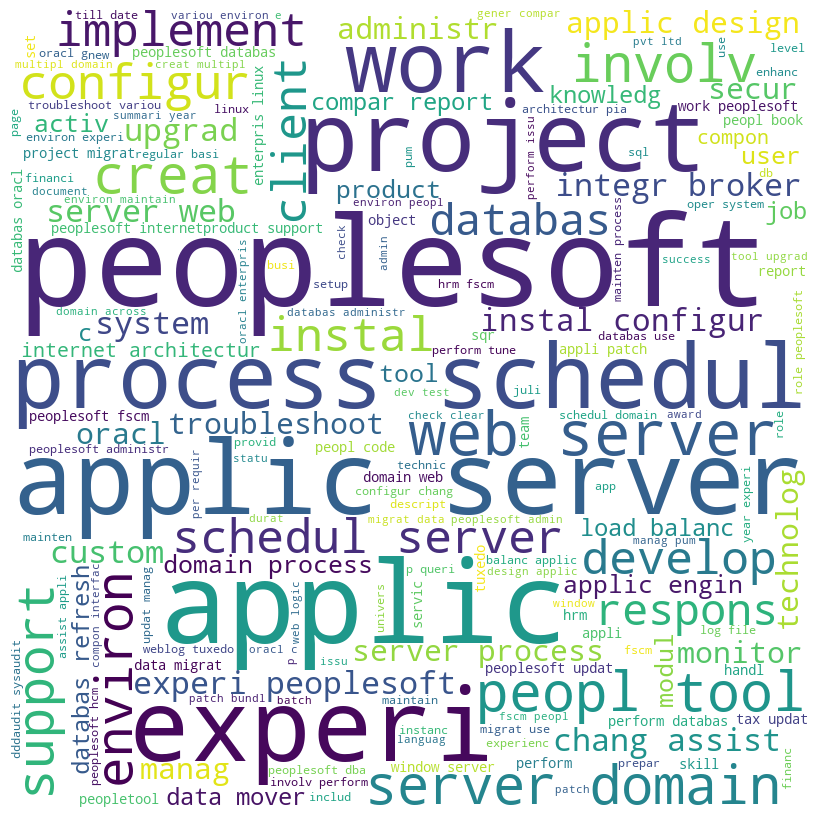

Word Cloud for Category: React JS Developer


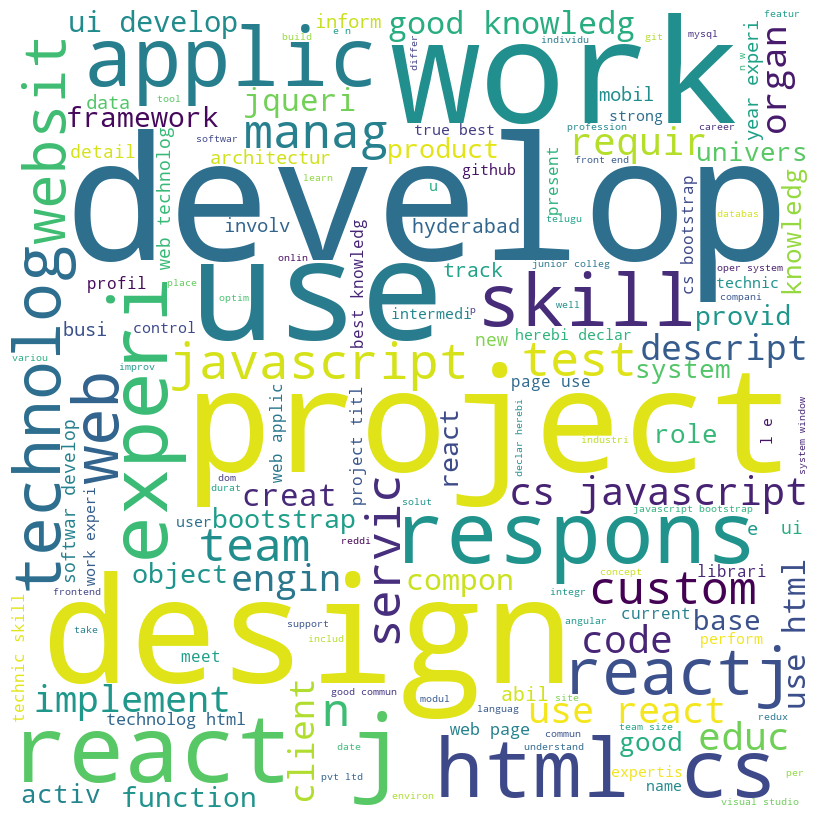

Word Cloud for Category: SQL Developer


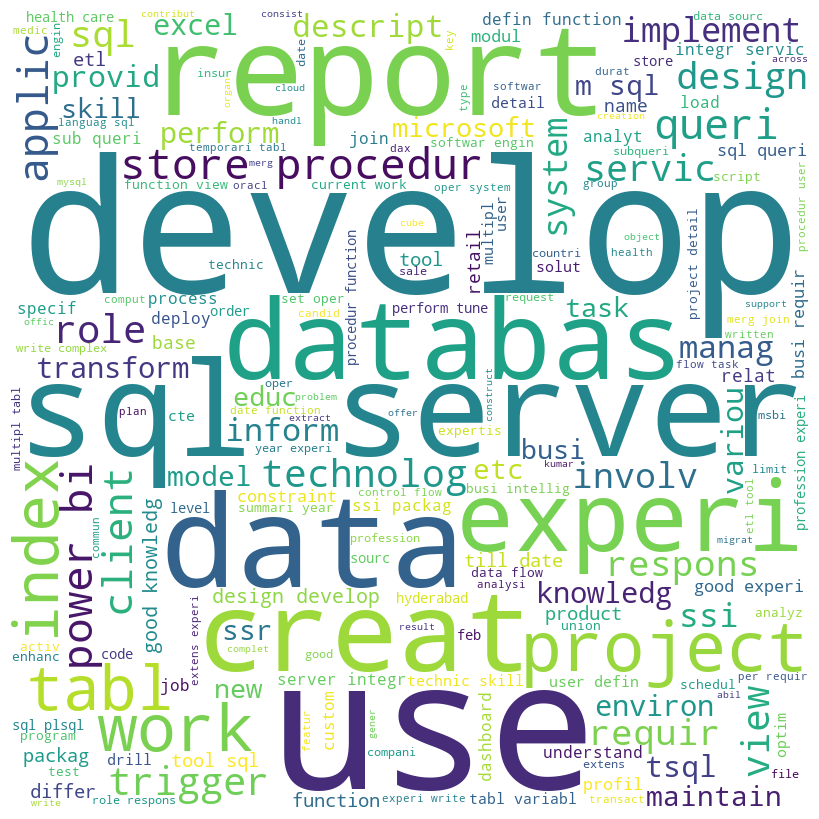

Word Cloud for Category: Workday


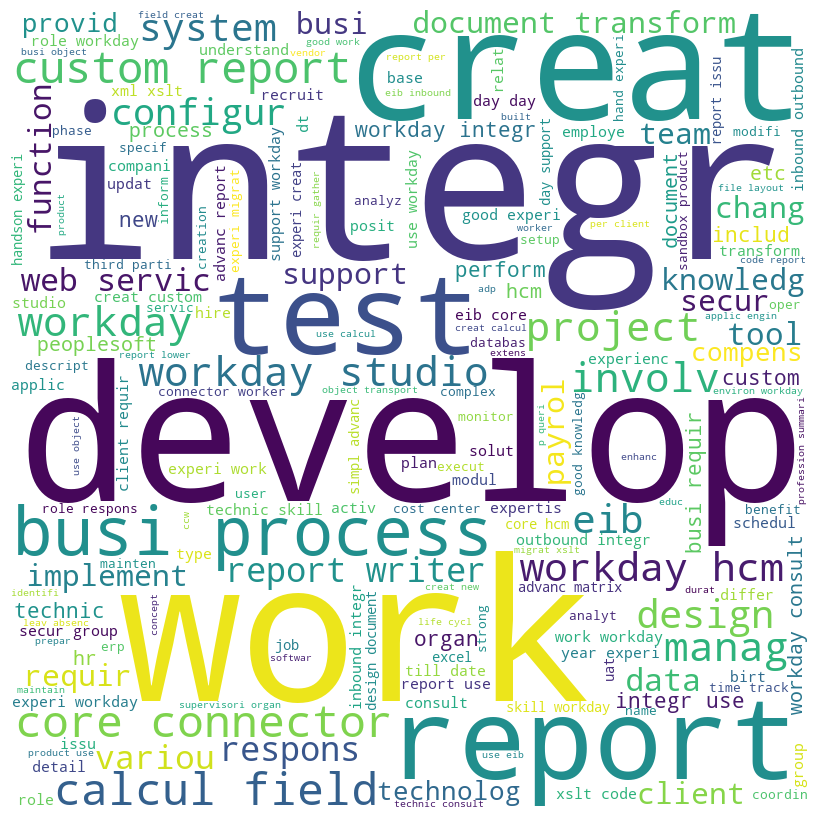

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud for a given text
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Assuming df is your DataFrame with a column named 'Category' and 'Lemmatized_Text'

# Generate word clouds for each category
categories = af['Category'].unique()
for category in categories:
    # Filter DataFrame for the current category
    category_df = af[af['Category'] == category]
    # Concatenate lemmatized text from all rows corresponding to the current category
    category_text = ' '.join(category_df['Lemmatized_Text'])
    # Generate word cloud for the concatenated lemmatized text of the current category
    print("Word Cloud for Category:", category)
    generate_word_cloud(category_text)


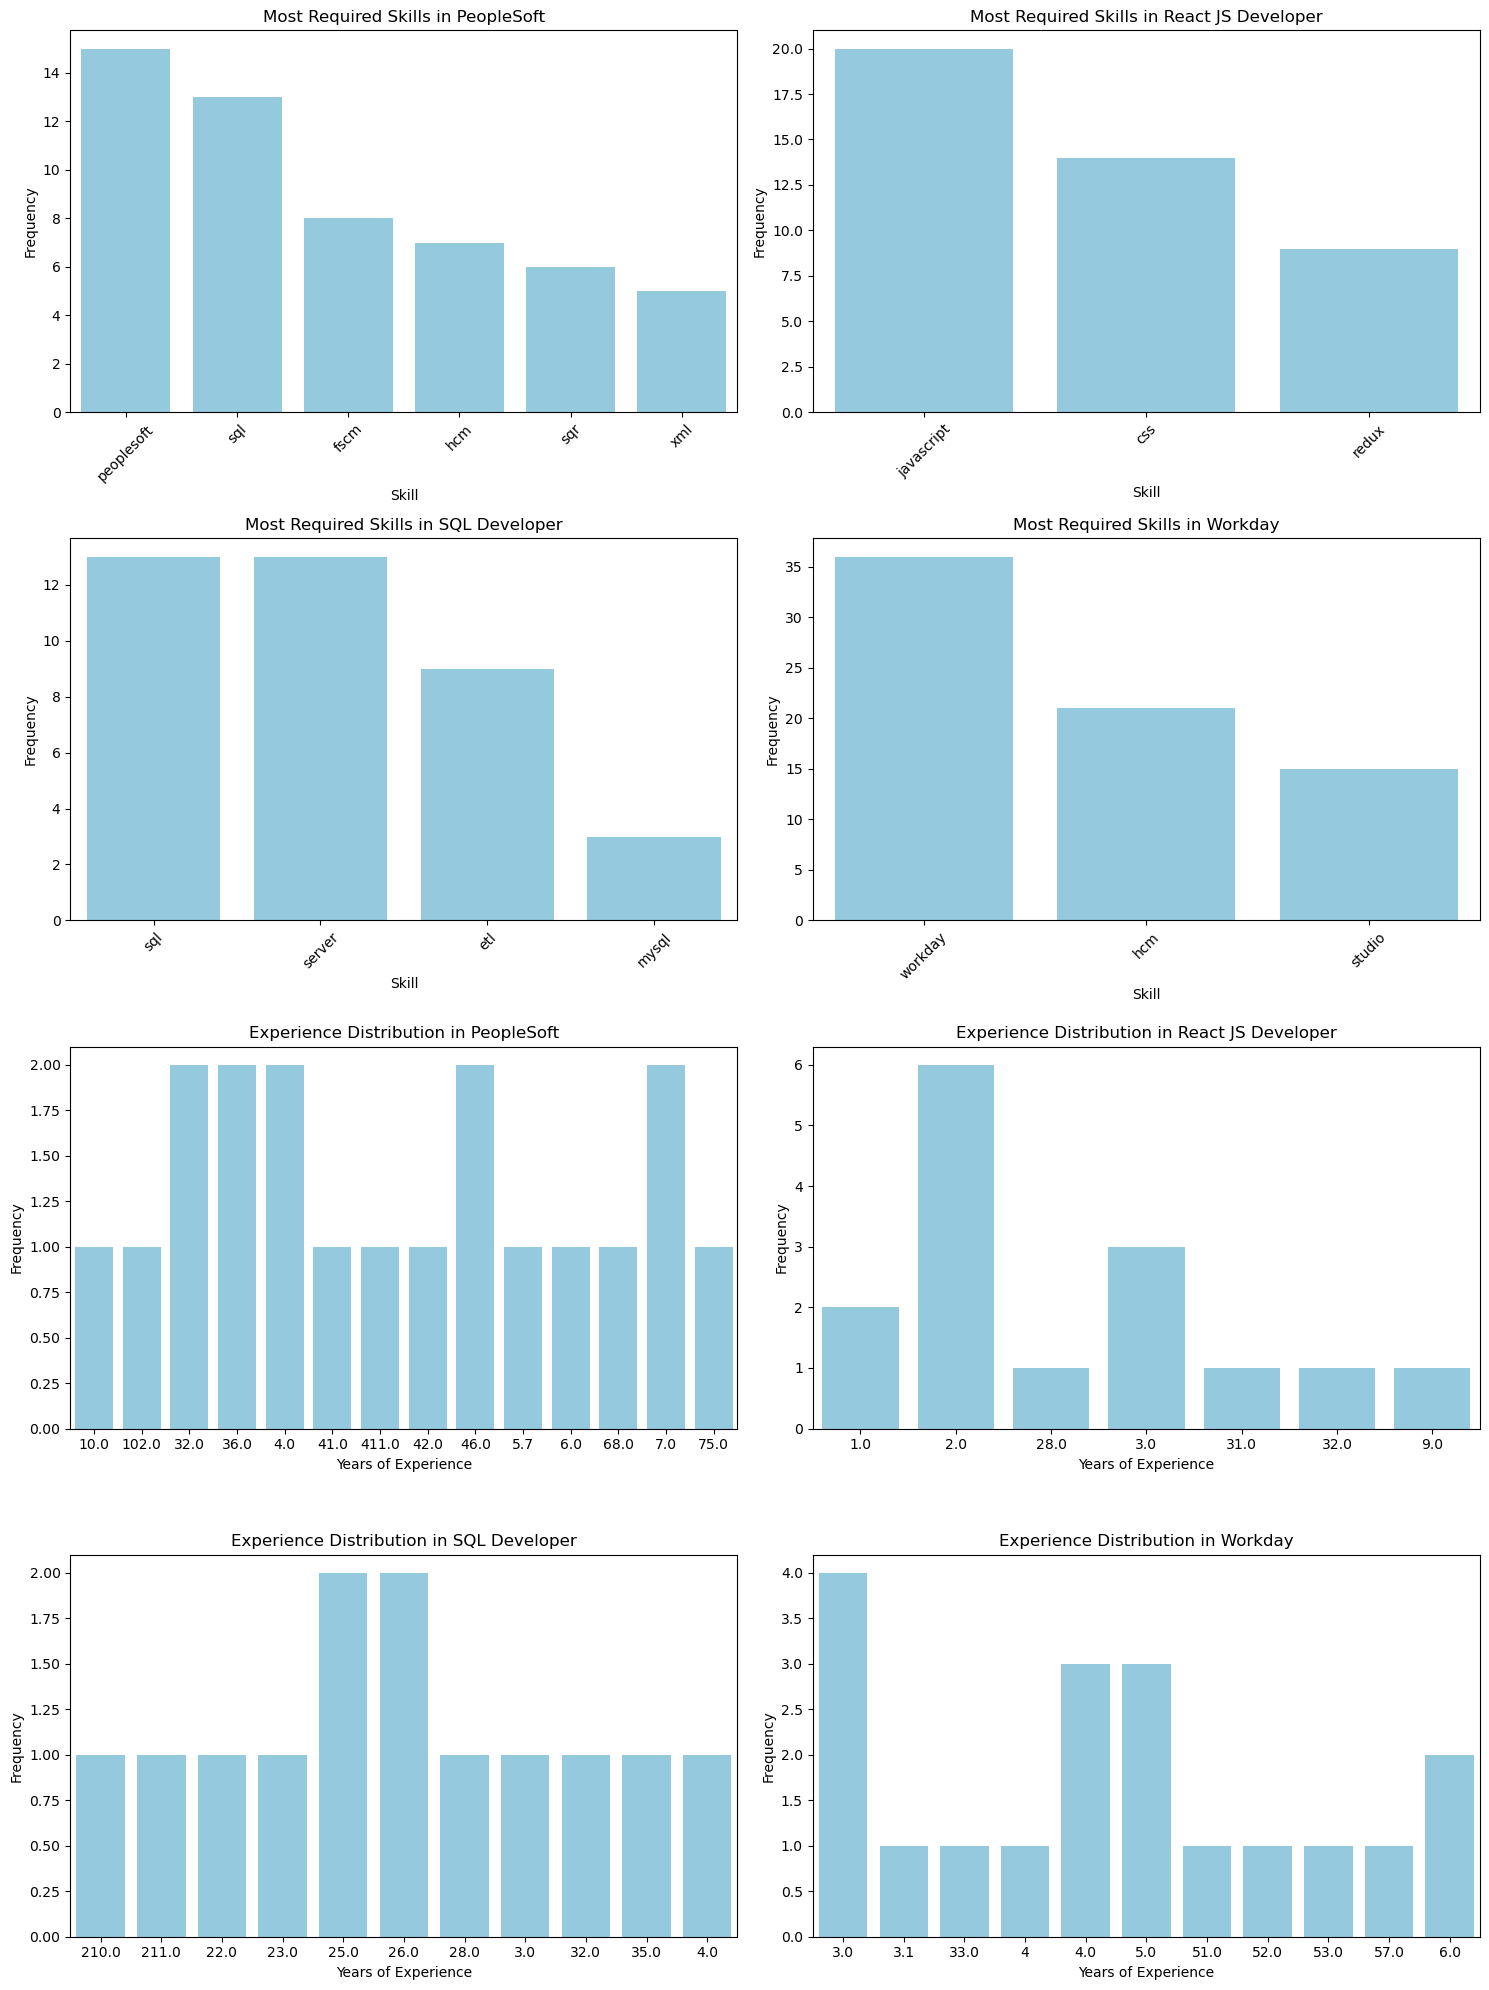

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize

# Sample DataFrame with 'Skills', 'Years_Experience', and 'Category' columns
# df = your_existing_dataframe

# Define category names
category_names = ['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday']

# Initialize empty dictionaries to store word frequencies for each category
word_counts_by_category = {}
experience_counts_by_category = {}

# Iterate over category names
for category in category_names:
    # Filter DataFrame for the current category
    category_df = af[af['Category'] == category]

    # Tokenize skills into individual words for the current category
    all_skills = [word for skills in category_df['Skills'] for word in word_tokenize(skills)]
    # Extract years of experience for the current category
    all_experience = [exp for exp in category_df['Years_Experience']]

    # Filter out single-character words and non-alphabetic words for skills
    all_skills = [word.lower() for word in all_skills if len(word) > 1 and word.isalpha()]
    # Filter out non-numeric values for experience
    all_experience = [str(exp) for exp in all_experience if isinstance(exp, int) or str(exp).replace('.', '', 1).isdigit()]

    # Count occurrences of each word for skills
    skill_counts = Counter(all_skills)
    # Count occurrences of each value for experience
    experience_counts = Counter(all_experience)

    # Store word frequencies for the current category in the dictionaries
    word_counts_by_category[category] = skill_counts
    experience_counts_by_category[category] = experience_counts

# Plot word frequency for each category
plt.figure(figsize=(15, 20))

# Iterate over categories and plot separate bar charts for each category
for i, (category, word_counts) in enumerate(word_counts_by_category.items(), start=1):
    plt.subplot(4, 2, i)
    word_counts_df = pd.DataFrame({'Word': list(word_counts.keys()), 'Frequency': list(word_counts.values())})
    word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
    sns.barplot(x='Word', y='Frequency', data=word_counts_df.head(20), color='skyblue')
    plt.title(f'Most Required Skills in {category}')
    plt.xlabel('Skill')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

# Plot experience frequency for each category
for i, (category, experience_counts) in enumerate(experience_counts_by_category.items(), start=5):
    plt.subplot(4, 2, i)
    experience_counts_df = pd.DataFrame({'Experience': list(experience_counts.keys()), 'Frequency': list(experience_counts.values())})
    experience_counts_df = experience_counts_df.sort_values(by='Experience', ascending=True)
    sns.barplot(x='Experience', y='Frequency', data=experience_counts_df, color='skyblue')
    plt.title(f'Experience Distribution in {category}')
    plt.xlabel('Years of Experience')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature extraction

### Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform 'Categories' column
af['Category'] = label_encoder.fit_transform(af['Category'])

# Print the mapping of original categories to encoded labels
print("Mapping of original categories to encoded labels:")
for original_category, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_category}: {encoded_label}")

# Print the transformed DataFrame
print("\nDataFrame after label encoding:")
print(af)

Mapping of original categories to encoded labels:
PeopleSoft: 0
React JS Developer: 1
SQL Developer: 2
Workday: 3

DataFrame after label encoding:
    Category                                     Cleaned_Resume  \
0          0  anubhav kumar singh core compet script shell s...   
1          0  g ananda rayudu httpswwwlinkedincominanandguda...   
2          0  peoplesoft databas administr gangareddi profes...   
3          0  classif intern classif intern murali experi su...   
4          0  priyanka ramadoss 6146 mountpleas coonoor nilg...   
..       ...                                                ...   
73         3  workday integr consult name sri krishna profes...   
74         3  srikanth workday hcm consult seek suitabl posi...   
75         3  workday hcm fcm name kumar ss role workday con...   
76         3  venkateswarlub workday consult profession summ...   
77         3  vinay kumar v workday function consult experti...   

   Years_Experience                             

In [109]:
# Columns to remove
columns_to_remove = ['Cleaned_Resume', 'Cleaned_Text','Text_Without_Stopwords']

# Remove the specified columns
af = af.drop(columns=columns_to_remove)

In [110]:
af

,Category,Years_Experience,Skills,Lemmatized_Text
0,0,NaN,"PeopleSoft HCM, PeopleSoft FSCM",anubhav kumar singh core compet script shell s...
1,0,7.0,,g ananda rayudu httpswwwlinkedincominanandguda...
2,0,4.0,"PeopleSoft HCM, PeopleSoft FSCM, SQL, SQR",peoplesoft databas administr gangareddi profes...
3,0,6.0,SQL,classif intern classif intern murali experi su...
4,0,411.0,"SQL, SQR",priyanka ramadoss mountpleas coonoor nilgiri c...
...,...,...,...,...
73,3,4.0,"Workday, HCM, Workday Studio",workday integr consult name sri krishna profes...
74,3,4.0,"Workday, HCM, Workday Studio",srikanth workday hcm consult seek suitabl posi...
75,3,6.0,"Workday, HCM, Workday Studio",workday hcm fcm name kumar s role workday cons...
76,3,53.0,"Workday, HCM, Workday Studio",venkateswarlub workday consult profession summ...


## Bag of words

In [111]:
#Bag of words
requiredText = af["Lemmatized_Text"]
requiredTarget = af["Category"].values
Countvectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = Countvectorizer.fit_transform(requiredText)
Countvectorizer.vocabulary_

{'anubhav': 153,
 'kumar': 1710,
 'singh': 2892,
 'core': 660,
 'compet': 589,
 'script': 2788,
 'shell': 2854,
 'applic': 168,
 'peoplesoft': 2281,
 'hcm': 1365,
 'financi': 1159,
 'oper': 2162,
 'linux': 1776,
 'window': 3506,
 'webapp': 3477,
 'server': 2827,
 'weblog': 3479,
 'tuxedo': 3298,
 'rdbm': 2554,
 'oracl': 2171,
 'repositori': 2642,
 'github': 1265,
 'work': 3521,
 'global': 1273,
 'competit': 590,
 'environ': 1030,
 'challeng': 499,
 'assign': 217,
 'shall': 2849,
 'yield': 3568,
 'twin': 3301,
 'benefit': 323,
 'job': 1644,
 'satisfact': 2756,
 'steadypac': 3025,
 'profession': 2427,
 'growth': 1325,
 'experi': 1084,
 'current': 728,
 'hcl': 1364,
 'role': 2704,
 'admin': 43,
 'offshor': 2140,
 'skill': 2904,
 'administr': 48,
 'manag': 1842,
 'fscm': 1213,
 'product': 2425,
 'support': 3098,
 'instal': 1554,
 'o': 2116,
 'involv': 1598,
 'day': 766,
 'activ': 31,
 'project': 2436,
 'migrat': 1932,
 'databas': 753,
 'refresh': 2604,
 'chang': 501,
 'tax': 3152,
 'updat'

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming requiredText contains your text data and requiredTarget contains your target variable

# Initialize CountVectorizer to create bag-of-words representation
vectorizer = CountVectorizer()

# Fit and transform the text data to create WordFeatures
WordFeatures = vectorizer.fit_transform(requiredText)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size=0.2)

# Print the shapes of the training and testing sets
print("X Train shape:", x_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:", x_test.shape)
print("Y Test shape:", y_test.shape)

X Train shape: (62, 3636)
Y Train shape: (62,)
X Test shape: (16, 3636)
Y Test shape: (16,)


## Model Buildinng

In [114]:
# 1. LOGISTIC REGRESSION
#IMPORTING NECESSARY LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report
import numpy as np
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train,y_train)

#Predicting on Training Data
pred_train_log = logistic_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_log = np.mean(pred_train_log==y_train)
print("ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION:", train_acc_log)

#Predicting on Test Data
pred_test_log = logistic_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_log = np.mean(pred_test_log==y_test)
print("ACCURACY OF TEST DATA IN LOGISTIC REGRESSION:",test_acc_log )

#Confusion Matrix
logistic_cm = confusion_matrix(y_test,pred_test_log)

#Classification Report
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n", classification_report(y_test,pred_test_log))

ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION: 1.0
ACCURACY OF TEST DATA IN LOGISTIC REGRESSION: 0.9375
CLASSIFICATION REPORT OF LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [115]:
accuracy_log = round(accuracy_score(y_test,pred_test_log),4)
precision_log = round(precision_score(y_test,pred_test_log,average = 'macro'),4)
recall_log = round(recall_score(y_test,pred_test_log,average = 'macro'),4)
f1_log = round(f1_score(y_test,pred_test_log,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_log )
print('Precision Score  : ',precision_log )
print('Recall Score     : ', recall_log)
print('f1-Score         : ',f1_log )

Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9375
f1-Score         :  0.9365


In [116]:
### 2. DECISION TREE
#IMPORTING NECESSARY LIBRARIES FOR DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
DT_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_dt = DT_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt==y_train)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_dt )

#Predicting on Test Data
pred_test_dt = DT_classifier.predict(x_test)
#Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt==y_test)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_dt )

#Confusion Matrix
dt_cm = confusion_matrix(y_test,pred_test_dt)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test,pred_test_dt))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.8387096774193549
ACCURACY OF TEST DATA IN DECISION TREE: 0.6875
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      1.00      0.67         4
           2       0.00      0.00      0.00         4
           3       1.00      0.86      0.92         7

    accuracy                           0.69        16
   macro avg       0.50      0.71      0.56        16
weighted avg       0.59      0.69      0.61        16



In [117]:
accuracy_dt = round(accuracy_score(y_test,pred_test_dt),4)
precision_dt = round(precision_score(y_test,pred_test_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,pred_test_dt,average = 'macro'),4)
f1_dt = round(f1_score(y_test,pred_test_dt,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_dt )
print('Precision Score  : ',precision_dt )
print('Recall Score     : ', recall_dt)
print('f1-Score         : ',f1_dt )

Accuracy Score   :  0.6875
Precision Score  :  0.5
Recall Score     :  0.7143
f1-Score         :  0.5641


In [118]:
### 3. RANDOM FOREST 
#IMPORTING NECESSARY LIBRARIES FOR RANDOM FOREST
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(x_train,y_train)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==y_train)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==y_test)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf )

#Confusion Matrix
rf_cm = confusion_matrix(y_test,pred_test_rf)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 0.9375
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [120]:
accuracy_rf = round(accuracy_score(y_test,pred_test_rf),4)
precision_rf = round(precision_score(y_test,pred_test_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,pred_test_rf,average = 'macro'),4)
f1_rf = round(f1_score(y_test,pred_test_rf,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_rf )
print('Precision Score  : ',precision_rf )
print('Recall Score     : ', recall_rf)
print('f1-Score         : ',f1_rf )

Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9375
f1-Score         :  0.9365


In [121]:
### 4. MULTINOMIAL NAVIE BAYES
#IMPORTING NECESSARY LIBRARIES FOR MULTINOMIAL NAVIE BAYES
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

#Predicting On Train Data
pred_train_mb = classifier_mb.predict(x_train)
#Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb==y_train)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES:", train_acc_mb)

#Predicting On Test Data
pred_test_mb = classifier_mb.predict(x_test)
#Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb==y_test)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES:", test_acc_mb)

#Confusion Matrix
mb_cm = confusion_matrix(y_test,pred_test_mb)

#Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:\n", classification_report(y_test,pred_test_mb))

ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES: 1.0
ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES: 1.0
CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [122]:
accuracy_mb = round(accuracy_score(y_test,pred_test_mb),4)
precision_mb = round(precision_score(y_test,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test,pred_test_mb,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_mb )
print('Precision Score  : ',precision_mb )
print('Recall Score     : ', recall_mb)
print('f1-Score         : ',f1_mb )

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0


In [123]:
### 5. SUPPORT VECTOR MACHINE 
##IMPORTING NECESSARY LIBRARIES FOR SUPPORT VECTOR MACHINE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(x_train,y_train)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(x_train)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(x_test)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 0.9375
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [124]:
accuracy_svm = round(accuracy_score(y_test,pred_test_svm),4)
precision_svm = round(precision_score(y_test,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test,pred_test_svm,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_svm )
print('Precision Score  : ',precision_svm )
print('Recall Score     : ', recall_svm)
print('f1-Score         : ',f1_svm )

Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9375
f1-Score         :  0.9365


In [125]:
table = {'Classifier' : ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE'], 'Accuracy_Score' : [accuracy_log, accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm], 'Precision_Score' : [precision_log, precision_dt, precision_rf, precision_mb, precision_svm], 'Recall_Score' : [recall_log, recall_dt, recall_rf, recall_mb, recall_svm], 'F1-Score' : [f1_log, f1_dt, f1_rf, f1_mb, f1_svm]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,0.9375,0.95,0.9375,0.9365
1,DECISION TREE,0.6875,0.50,0.7143,0.5641
2,RANDOM FOREST,0.9375,0.95,0.9375,0.9365
3,MULTINOMIAL NAIVE BAYES,1.0000,1.00,1.0000,1.0000
4,SUPPORT VECTOR MACHINE,0.9375,0.95,0.9375,0.9365


In [126]:
### ACCURACY COMPARISON PLOT

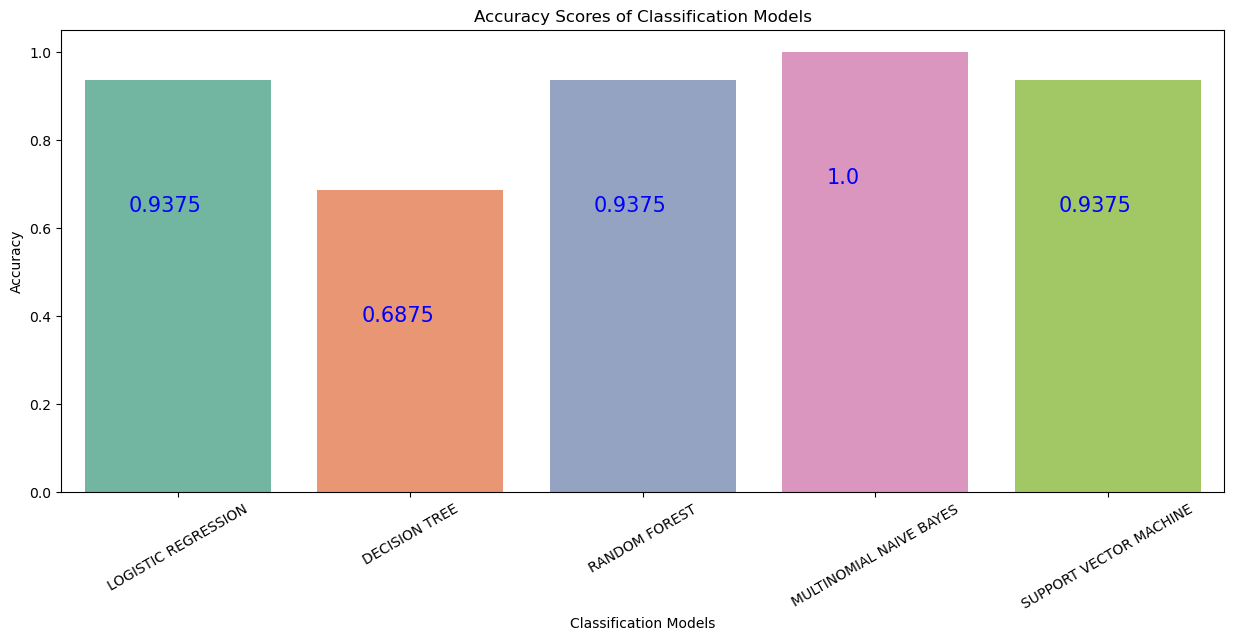

In [127]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()


## Now using TFIDF

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
Tfidfvectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english')

# Fit and transform the text data
tfidf = Tfidfvectorizer.fit_transform(requiredText)

# Vocabulary
print(Tfidfvectorizer.vocabulary_)

{'anubhav': 153, 'kumar': 1710, 'singh': 2892, 'core': 660, 'compet': 589, 'script': 2788, 'shell': 2854, 'applic': 168, 'peoplesoft': 2281, 'hcm': 1365, 'financi': 1159, 'oper': 2162, 'linux': 1776, 'window': 3506, 'webapp': 3477, 'server': 2827, 'weblog': 3479, 'tuxedo': 3298, 'rdbm': 2554, 'oracl': 2171, 'repositori': 2642, 'github': 1265, 'work': 3521, 'global': 1273, 'competit': 590, 'environ': 1030, 'challeng': 499, 'assign': 217, 'shall': 2849, 'yield': 3568, 'twin': 3301, 'benefit': 323, 'job': 1644, 'satisfact': 2756, 'steadypac': 3025, 'profession': 2427, 'growth': 1325, 'experi': 1084, 'current': 728, 'hcl': 1364, 'role': 2704, 'admin': 43, 'offshor': 2140, 'skill': 2904, 'administr': 48, 'manag': 1842, 'fscm': 1213, 'product': 2425, 'support': 3098, 'instal': 1554, 'o': 2116, 'involv': 1598, 'day': 766, 'activ': 31, 'project': 2436, 'migrat': 1932, 'databas': 753, 'refresh': 2604, 'chang': 501, 'tax': 3152, 'updat': 3342, 'troubleshoot': 3291, 'variou': 3381, 'like': 1766, 

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TfidfVectorizer to create TF-IDF representation
vectorizer = TfidfVectorizer()

# Fit and transform the text data to create TF-IDF features
TFIDFFeatures = vectorizer.fit_transform(requiredText)

# Split the data into training and testing sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(TFIDFFeatures, requiredTarget, random_state=0, test_size=0.2)

# Print the shapes of the training and testing sets
print("X Train shape:", x_train1.shape)
print("Y Train shape:", y_train1.shape)
print("X Test shape:", x_test1.shape)
print("Y Test shape:", y_test1.shape)

X Train shape: (62, 3636)
Y Train shape: (62,)
X Test shape: (16, 3636)
Y Test shape: (16,)


In [130]:
#logistic regression
#IMPORTING NECESSARY LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [131]:
import numpy as np
logistic_classifier = LogisticRegression()
logistic_classifier.fit(x_train1,y_train1)

#Predicting on Training Data
pred_train_log = logistic_classifier.predict(x_train1)
#Accuracy On Train Data
train_acc_log = np.mean(pred_train_log==y_train1)
print("ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION:", train_acc_log)

#Predicting on Test Data
pred_test_log = logistic_classifier.predict(x_test1)
#Accuracy On Test Data
test_acc_log = np.mean(pred_test_log==y_test1)
print("ACCURACY OF TEST DATA IN LOGISTIC REGRESSION:",test_acc_log )

#Confusion Matrix
logistic_cm = confusion_matrix(y_test1,pred_test_log)

#Classification Report
print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n", classification_report(y_test1,pred_test_log))

ACCURACY OF TRAIN DATA IN LOGISTIC REGRESSION: 1.0
ACCURACY OF TEST DATA IN LOGISTIC REGRESSION: 0.9375
CLASSIFICATION REPORT OF LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [132]:
accuracy_log = round(accuracy_score(y_test1,pred_test_log),4)
precision_log = round(precision_score(y_test1,pred_test_log,average = 'macro'),4)
recall_log = round(recall_score(y_test1,pred_test_log,average = 'macro'),4)
f1_log = round(f1_score(y_test1,pred_test_log,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_log )
print('Precision Score  : ',precision_log )
print('Recall Score     : ', recall_log)
print('f1-Score         : ',f1_log )

Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9375
f1-Score         :  0.9365


In [133]:
### 2. DECISION TREE
#IMPORTING NECESSARY LIBRARIES FOR DECISION TREE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
DT_classifier.fit(x_train1,y_train1)

#Predicting on Train Data
pred_train_dt = DT_classifier.predict(x_train1)
#Accuracy On Train Data
train_acc_dt = np.mean(pred_train_dt==y_train1)
print("ACCURACY OF TRAIN DATA IN DECISION TREE:",train_acc_dt )

#Predicting on Test Data
pred_test_dt = DT_classifier.predict(x_test1)
#Accuracy on Test Data
test_acc_dt = np.mean(pred_test_dt==y_test1)
print("ACCURACY OF TEST DATA IN DECISION TREE:",test_acc_dt )

#Confusion Matrix
dt_cm = confusion_matrix(y_test1,pred_test_dt)

#Classification Report
print("CLASSIFICATION REPORT OF DECISION TREE:\n", classification_report(y_test,pred_test_dt))

ACCURACY OF TRAIN DATA IN DECISION TREE: 0.8387096774193549
ACCURACY OF TEST DATA IN DECISION TREE: 0.75
CLASSIFICATION REPORT OF DECISION TREE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         4
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00         7

    accuracy                           0.75        16
   macro avg       0.62      0.75      0.67        16
weighted avg       0.62      0.75      0.67        16



In [134]:
#Random forest
#IMPORTING NECESSARY LIBRARIES FOR RANDOM FOREST
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [135]:
RF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF_classifier = RandomForestClassifier(**RF)
RF_classifier.fit(x_train1,y_train1)

#Predicting on Train Data
pred_train_rf = RF_classifier.predict(x_train1)
#Accuracy On Train Data
train_acc_rf = np.mean(pred_train_rf==y_train1)
print("ACCURACY OF TRAIN DATA IN RANDOM FOREST:",train_acc_rf)

#Predicting on Test Data
pred_test_rf = RF_classifier.predict(x_test1)
#Accuracy On Test Data
test_acc_rf = np.mean(pred_test_rf==y_test1)
print("ACCURACY OF TEST DATA IN RANDOM FOREST:",test_acc_rf )

#Confusion Matrix
rf_cm = confusion_matrix(y_test,pred_test_rf)

#Classification Report
print("CLASSIFICATION REPORT OF RANDOM FOREST:\n", classification_report(y_test1,pred_test_rf))

ACCURACY OF TRAIN DATA IN RANDOM FOREST: 1.0
ACCURACY OF TEST DATA IN RANDOM FOREST: 0.9375
CLASSIFICATION REPORT OF RANDOM FOREST:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [136]:
### 4. MULTINOMIAL NAVIE BAYES
#IMPORTING NECESSARY LIBRARIES FOR MULTINOMIAL NAVIE BAYES
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()
classifier_mb.fit(x_train1,y_train1)

#Predicting On Train Data
pred_train_mb = classifier_mb.predict(x_train1)
#Accuracy On Train Data
train_acc_mb = np.mean(pred_train_mb==y_train1)
print("ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES:", train_acc_mb)

#Predicting On Test Data
pred_test_mb = classifier_mb.predict(x_test1)
#Accuracy On Test Data
test_acc_mb = np.mean(pred_test_mb==y_test1)
print("ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES:", test_acc_mb)

#Confusion Matrix
mb_cm = confusion_matrix(y_test,pred_test_mb)

#Classification Report
print("CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:\n", classification_report(y_test1,pred_test_mb))

ACCURACY OF TRAIN DATA IN MULTINOMIAL NAVIE BAYES: 1.0
ACCURACY OF TEST DATA IN MULTINOMIAL NAVIE BAYES: 0.875
CLASSIFICATION REPORT OF MULTINOMIAL NAVIE BAYES:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         7

    accuracy                           0.88        16
   macro avg       0.83      0.88      0.79        16
weighted avg       0.96      0.88      0.89        16



In [137]:
accuracy_mb = round(accuracy_score(y_test1,pred_test_mb),4)
precision_mb = round(precision_score(y_test1,pred_test_mb,average = 'macro'),4)
recall_mb = round(recall_score(y_test1,pred_test_mb,average = 'macro'),4)
f1_mb = round(f1_score(y_test1,pred_test_mb,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_mb )
print('Precision Score  : ',precision_mb )
print('Recall Score     : ', recall_mb)
print('f1-Score         : ',f1_mb )

Accuracy Score   :  0.875
Precision Score  :  0.8333
Recall Score     :  0.875
f1-Score         :  0.7917


In [138]:
### 5. SUPPORT VECTOR MACHINE 

In [139]:
##IMPORTING NECESSARY LIBRARIES FOR SUPPORT VECTOR MACHINE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [140]:
svm_classifier = (SVC(kernel='linear'))
svm_classifier.fit(x_train1,y_train1)

#Predicting On Train Data
pred_train_svm = svm_classifier.predict(x_train1)
#Accuracy On Train Data
train_acc_svm = np.mean(pred_train_svm==y_train1)
print("ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE:",train_acc_svm )

#Prediciting On Test Data
pred_test_svm = svm_classifier.predict(x_test1)
#Accuracy On Test Data
test_acc_svm = np.mean(pred_test_svm==y_test1)
print("ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE:",test_acc_svm)

#Confusion Matrix
svm_cm = confusion_matrix(y_test1,pred_test_svm)

#Classification Report
print("CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:\n", classification_report(y_test1,pred_test_svm))

ACCURACY OF TRAIN DATA IN SUPPORT VECTOR MACHINE: 1.0
ACCURACY OF TEST DATA IN SUPPORT VECTOR MACHINE: 0.9375
CLASSIFICATION REPORT OF SUPPORT VECTOR MACHINE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [141]:
accuracy_svm = round(accuracy_score(y_test1,pred_test_svm),4)
precision_svm = round(precision_score(y_test1,pred_test_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test1,pred_test_svm,average = 'macro'),4)
f1_svm = round(f1_score(y_test1,pred_test_svm,average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ',accuracy_svm )
print('Precision Score  : ',precision_svm )
print('Recall Score     : ', recall_svm)
print('f1-Score         : ',f1_svm )

Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9375
f1-Score         :  0.9365


In [143]:
table = {'Classifier' : ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST', 'MULTINOMIAL NAIVE BAYES', 'SUPPORT VECTOR MACHINE'], 'Accuracy_Score' : [accuracy_log, accuracy_dt, accuracy_rf, accuracy_mb, accuracy_svm], 'Precision_Score' : [precision_log, precision_dt, precision_rf, precision_mb, precision_svm], 'Recall_Score' : [recall_log, recall_dt, recall_rf, recall_mb, recall_svm], 'F1-Score' : [f1_log, f1_dt, f1_rf, f1_mb, f1_svm]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy_Score,Precision_Score,Recall_Score,F1-Score
0,LOGISTIC REGRESSION,0.9375,0.9500,0.9375,0.9365
1,DECISION TREE,0.6875,0.5000,0.7143,0.5641
2,RANDOM FOREST,0.9375,0.9500,0.9375,0.9365
3,MULTINOMIAL NAIVE BAYES,0.8750,0.8333,0.8750,0.7917
4,SUPPORT VECTOR MACHINE,0.9375,0.9500,0.9375,0.9365


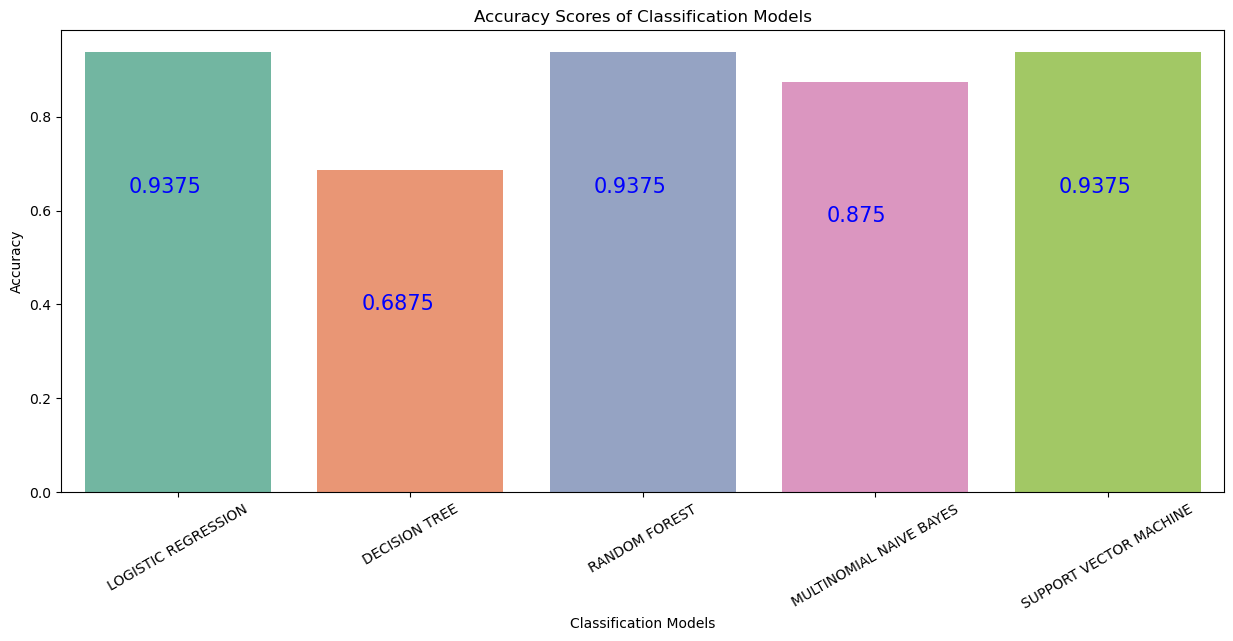

In [144]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=table.Classifier, y=table.Accuracy_Score, palette =sns.color_palette("Set2") )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

## Pipline

In [146]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pickle

# Define preprocessing functions
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Load the dataset
# Assuming 'af' contains the preprocessed DataFrame

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(af['Lemmatized_Text'], af['Category'], test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Save the pipeline using pickle
with open('resume_classification_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

Train Accuracy: 1.0
Test Accuracy: 0.9375


In [147]:
import pickle

# Save the pre-trained model
with open('resume_classification_pipeline1.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Save the LabelEncoder
with open('label_encoder1.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)